# The Neural Code: Exercises 1

In [10]:
import numpy as np
from matplotlib import pyplot as plt

__Exercise 3.(a)__

In [11]:
N = 10
lambdas = np.linspace(0.1, 1, N)
T = 100
t_all_trials = []

for i_trial in range(N):
    t_trial = [-1]
    while t_trial[-1] < T:
        u = np.random.rand()
        ISI = -np.log(1-u) / lambdas[i_trial]
        if t_trial[-1] + ISI > T:
            break
        else:
            if t_trial[-1] == -1:
                t_trial[-1] = ISI
            else:
                t_trial.append(t_trial[-1] + ISI)
    t_all_trials.append(t_trial)

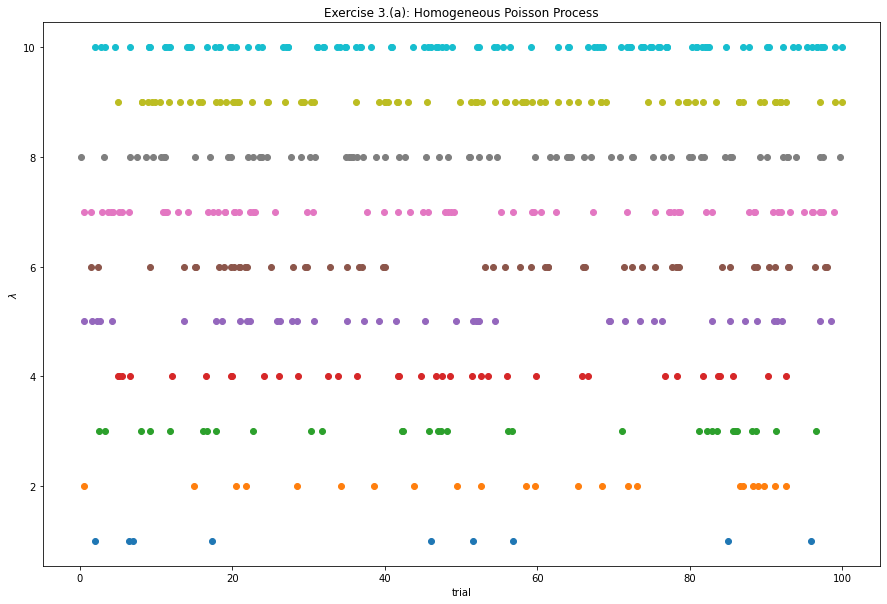

In [12]:
plt.figure(figsize = (15,10))
for i_trial in range(N):
    plt.scatter(t_all_trials[i_trial], np.full(len(t_all_trials[i_trial]), i_trial + 1))
    plt.xlabel('trial')
    plt.ylabel('$\lambda$')
    plt.title('Exercise 3.(a): Homogeneous Poisson Process')

__Exercise 3.(b)__

In [30]:
def my_integral(lam, t, m, T):
    result = ((lam/2)*t) + (((lam*T)/(4*np.pi*m)) * np.sin((2*np.pi*m/T)*t))
    return result

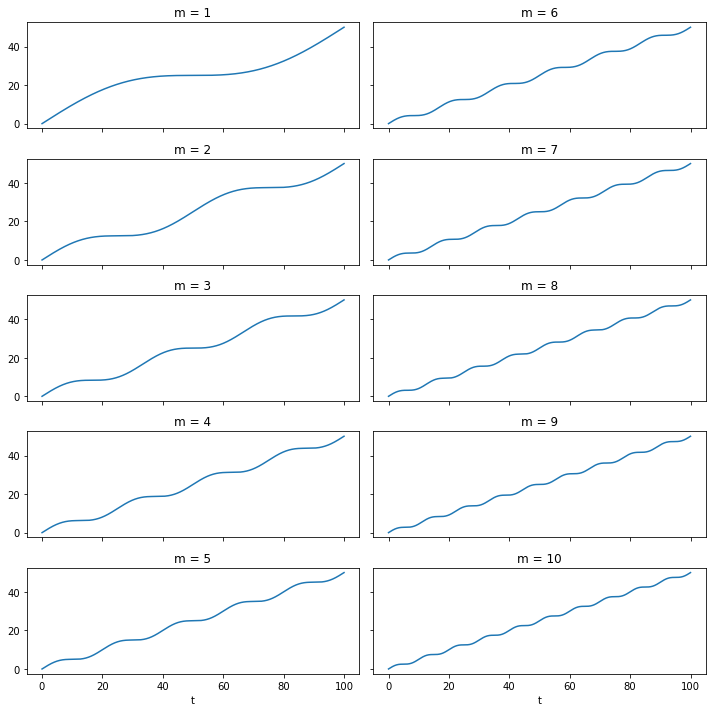

In [180]:
N = 10
t = np.linspace(0, 100, 10000)
fig, ax = plt.subplots(N//2, 2, sharex = 'all', sharey = 'all', figsize = (10, 10))
for i in range(N):
    m = i+1
    y = my_integral(1, t, m, 100)
    if m <= N//2:
        ax[i%(N//2), 0].plot(x, y)
        ax[i%(N//2), 0].set_title('m = {}'.format(m))
    else:
        ax[i%(N//2), 1].plot(x, y)
        ax[i%(N//2), 1].set_title('m = {}'.format(m))
    if m == N//2:
        ax[i%(N//2), 0].set_xlabel('t')
        ax[i%(N//2), 1].set_xlabel('t')
plt.tight_layout()

In [138]:
N = 10
T = 100
t_all_trials = []
ts = 0.1

for i_trial in range(N):
    left_expression = np.nan
    m = i_trial + 1
    t_trial = [-1]
    
    while t_trial[-1] < T:
        u = np.random.rand()
        
        if np.isnan(left_expression):
            left_expression = -np.log(1-u)
        else:
            left_expression += -np.log(1-u)
            
        right_expression = 0
        ISI = 0
        while left_expression > right_expression:
            right_expression = my_integral(1, ISI, m, T)
            if left_expression > right_expression:
                ISI += ts
        
        #if t_trial[-1] + ISI > T:
        if ISI - t_trial[-1] > T:
            break
        else:
            if t_trial[-1] == -1:
                t_trial[-1] = ISI
            else:
                #t_trial.append(t_trial[-1] + ISI)
                t_trial.append(ISI - t_trial[-1])
    t_all_trials.append(t_trial)

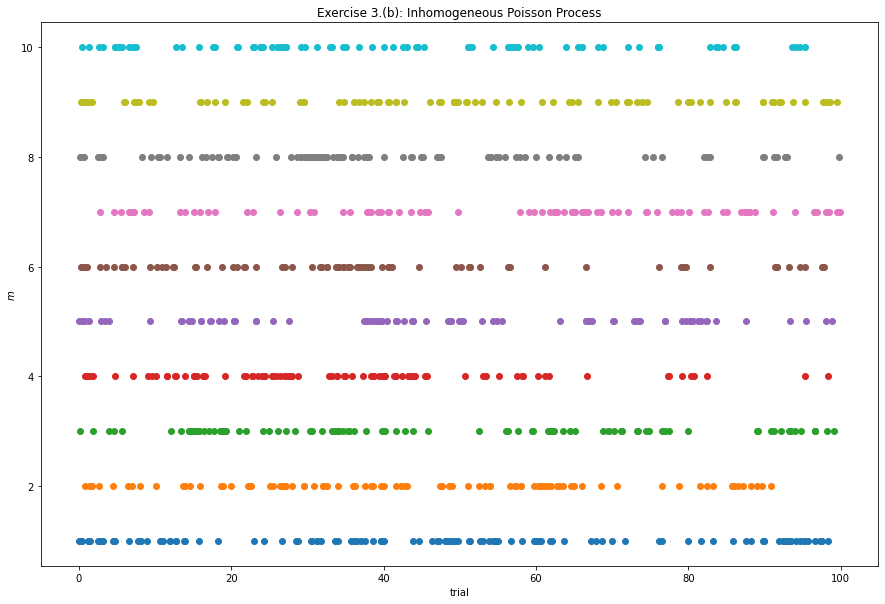

In [137]:
plt.figure(figsize = (15,10))
for i_trial in range(N):
    plt.scatter(t_all_trials[i_trial], np.full(len(t_all_trials[i_trial]), i_trial + 1))
    plt.xlabel('trial')
    plt.ylabel('$m$')
    plt.title('Exercise 3.(b): Inhomogeneous Poisson Process')

__Exercise 3.(c)__

In [24]:
def my_tau(m):
    tau = (2 ** (m-1)) / 1000
    return tau

In [25]:
N = 5
lam = 10
T = 50
tau_m = [6, 8, 10, 12, 14]
t_all_trials = []

for i_trial in range(N):
    t_trial = [-1]
    tau = my_tau(tau_m[i_trial])
    while t_trial[-1] < T:
        u = np.random.rand()
        ISI = -np.log(1-u) / lam
        if t_trial[-1] + ISI + tau > T:
            break
        else:
            if t_trial[-1] == -1:
                t_trial[-1] = ISI + tau
            else:
                t_trial.append(t_trial[-1] + ISI + tau)
    t_all_trials.append(t_trial)

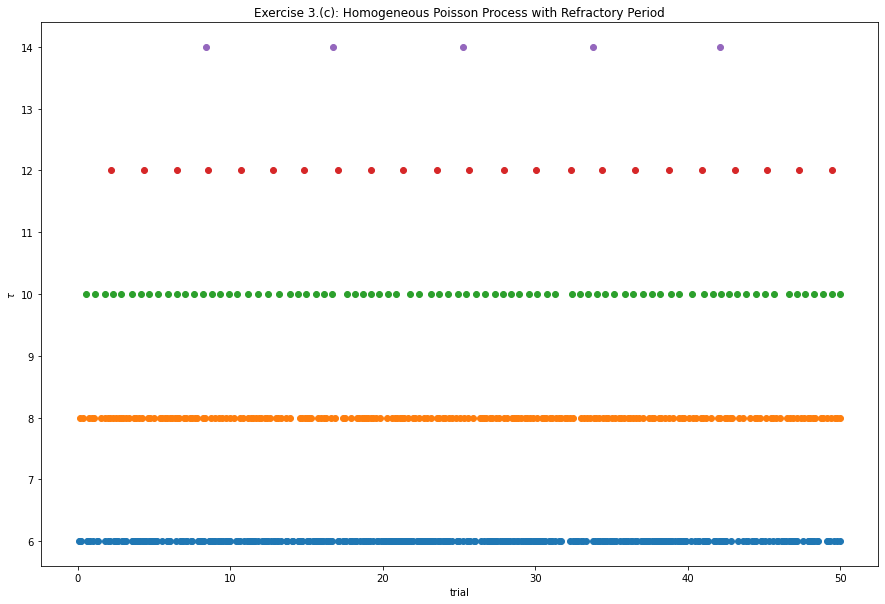

In [9]:
plt.figure(figsize = (15,10))
for i_trial in range(N):
    plt.scatter(t_all_trials[i_trial], np.full(len(t_all_trials[i_trial]), tau_m[i_trial]))
    plt.xlabel('trial')
    plt.ylabel('$\\tau$')
    plt.title('Exercise 3.(c): Homogeneous Poisson Process with Refractory Period')